In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv("autism.csv")

In [8]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18.605397,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,0,0,0,0
2,1,1,1,1,1,1,0,0,1,1,14.679893,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,61.035288,0,0,0,0
4,0,0,0,0,1,0,0,0,1,1,14.256686,1,0,1,0


In [30]:
data.shape

(800, 15)

In [9]:
# fix the spelling issue 
df = data.rename(columns = {'austim': 'autism'}, errors="raise")

In [10]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'autism', 'Class/ASD'],
      dtype='object')

### Target
##### Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [12]:
ASD_pos = df[df['Class/ASD']==1]
ASD_neg = df[df['Class/ASD']==0]

In [13]:
ASD_pos.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,Class/ASD
2,1,1,1,1,1,1,0,0,1,1,14.679893,0,0,0,1
8,1,1,1,1,1,1,1,1,1,0,20.305943,0,1,0,1
9,0,0,0,0,0,0,1,1,0,1,17.964599,0,1,0,1
12,1,0,1,1,1,1,1,1,1,1,29.112066,0,1,1,1
15,1,1,0,0,1,0,0,0,0,0,36.084360,0,1,0,1


In [14]:
ASD_neg.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18.605397,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,61.035288,0,0,0,0
4,0,0,0,0,1,0,0,0,1,1,14.256686,1,0,1,0
5,1,0,0,0,0,0,0,1,0,0,15.578191,1,0,0,0


### 4.1.1.1 Measure of central tendency (1.Mean, 2.Median,3.Mode)
### 4.1.1,2. Measure of location of the data (3.Percentile and 4.InterQuantile percentile)
### 4.1.1.3. Histogram and skewness,kurtosis
### 4.1.1.4. Measure of Spread (Variance,Standard deviation)

##### QUAN and QUAL

In [20]:
def QuanQual(df):
    Quan = [feature for feature in df.columns if df[feature].dtype != 'O']
    Qual = [feature for feature in df.columns if df[feature].dtype == 'O']
    return Quan,Qual

In [21]:
Quan,Qual= QuanQual(df)

In [22]:
Quan

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'gender',
 'jaundice',
 'autism',
 'Class/ASD']

In [23]:
Qual

[]

In [24]:
from UnivariateAnalysis import Univariate
result = Univariate.descriptive(df,Quan)
result

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,Class/ASD
Mean,0.5825,0.28625,0.32125,0.415,0.4575,0.20875,0.27375,0.7175,0.31625,0.46,28.612306,0.48125,0.245,0.14625,0.23125
Median,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.47996,0.0,0.0,0.0,0.0
Mode,1,0,0,0,0,0,0,1,0,0,9.560505,0,0,0,0
Q1:25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.282082,0.0,0.0,0.0,0.0
Q2:50%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.47996,0.0,0.0,0.0,0.0
Q3:75%,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,33.154755,1.0,0.0,0.0,0.0
99%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,69.052722,1.0,1.0,1.0,1.0
Q4:100%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,72.402488,1.0,1.0,1.0,1.0
IQR,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,13.872674,1.0,0.0,0.0,0.0
1.5_Rule,1.5,1.5,1.5,1.5,1.5,0.0,1.5,1.5,1.5,1.5,20.809011,1.5,0.0,0.0,0.0


### 4.1.1.2. Measure of location of the data (1.Frequency,2.Cumulative Frequency)
### "Unique_values","Frequency","Relative_Frequency","Cumsum"

In [25]:
from UnivariateAnalysis import Univariate
result = Univariate.FreqTable("jaundice",df)
result

,Unique_values,Frequency,Relative_Frequency,Cumsum
0,0,604,5.864078,5.864078
1,1,196,1.902913,7.766990


In [27]:
from UnivariateAnalysis import Univariate
result = Univariate.FreqTable("gender",df)
result

,Unique_values,Frequency,Relative_Frequency,Cumsum
0,0,415,4.029126,4.029126
1,1,385,3.737864,7.766990


In [28]:
from UnivariateAnalysis import Univariate
result = Univariate.FreqTable("autism",df)
result

,Unique_values,Frequency,Relative_Frequency,Cumsum
0,0,683,6.631068,6.631068
1,1,117,1.135922,7.766990


In [29]:
from UnivariateAnalysis import Univariate
result = Univariate.FreqTable("Class/ASD",df)
result

,Unique_values,Frequency,Relative_Frequency,Cumsum
0,0,615,5.970874,5.970874
1,1,185,1.796117,7.766990


In [31]:
def get_pdf_probability(df,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(df,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')

    #generate a sample
    sample=df

    # calculate parameter
    sample_mean=sample.mean()
    sample_std=sample.std()
    print("Mean=%.3f,Standard Deviation=%.3f" % (sample_mean,sample_std))

    #define the distribution
    dist=norm(sample_mean,sample_std)

    #sample probabilities for a range of outcomes
    values=[ value for value in range(startrange,endrange)]
    Probabilities=[dist.pdf(value) for value in values]
    prob=sum(Probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(Probabilities)))

    return prob

Mean=0.146,Standard Deviation=0.354
The area between range(0,1):1.0357946743515425


1.0357946743515425

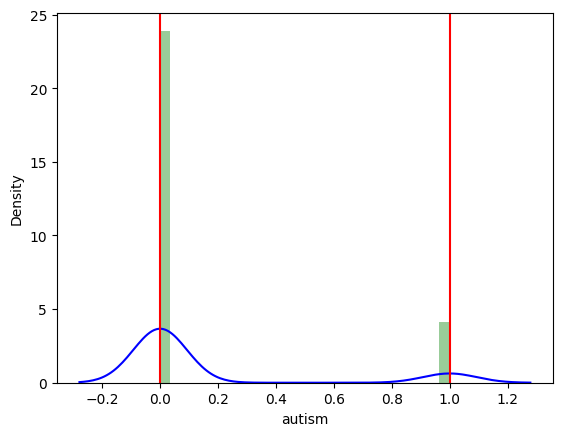

In [33]:
get_pdf_probability(df["autism"],0,1)

Mean=0.245,Standard Deviation=0.430
The area between range(0,1):0.788324504518003


0.788324504518003

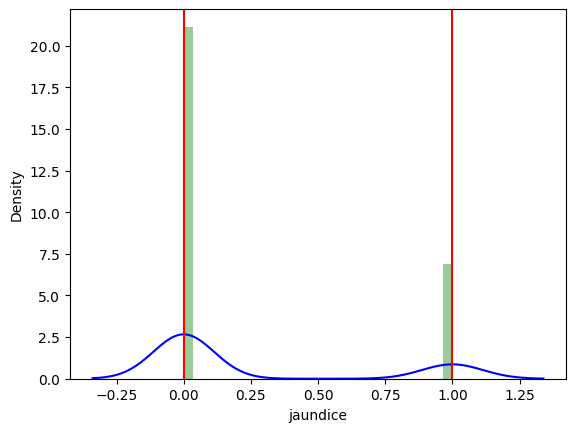

In [34]:
get_pdf_probability(df["jaundice"],0,1)

Mean=0.231,Standard Deviation=0.422
The area between range(0,1):0.8137030858935896


0.8137030858935896

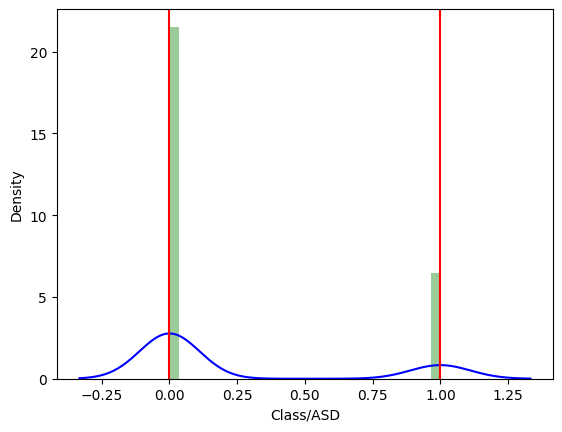

In [35]:
get_pdf_probability(df["Class/ASD"],0,1)

### cumulative density function

In [37]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(df['autism'])
ecdf(46)

1.0

In [38]:
ecdf(51)

1.0

In [40]:
ecdf(2)

1.0

# Bivariate Anaysis
        1. Co-variance and Corr
        2. Multicolinearity- VIF
        3. T-Test
        4. Hypothesis Testing
        5. Anavo

In [42]:
df2=df[Quan]

In [44]:
df2.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18.605397,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,0,0,0,0
2,1,1,1,1,1,1,0,0,1,1,14.679893,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,61.035288,0,0,0,0
4,0,0,0,0,1,0,0,0,1,1,14.256686,1,0,1,0


### Co-Variance

In [46]:
df2.cov()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,Class/ASD
A1_Score,0.243498,0.054578,0.072963,0.078360,0.086114,0.058476,0.044346,0.053373,0.070873,0.075895,0.437228,-0.034121,0.019812,0.028595,0.060372
A2_Score,0.054578,0.204567,0.081895,0.080056,0.066624,0.066579,0.052955,0.039665,0.084579,0.077171,0.702534,-0.027793,0.021145,0.039435,0.072645
A3_Score,0.072963,0.081895,0.218321,0.119330,0.104409,0.093055,0.073400,0.048314,0.117301,0.107359,1.137219,-0.033393,0.035088,0.059341,0.108346
A4_Score,0.078360,0.080056,0.119330,0.243079,0.132804,0.089731,0.077741,0.066070,0.120156,0.107985,1.156107,-0.041020,0.025857,0.049368,0.106665
A5_Score,0.086114,0.066624,0.104409,0.132804,0.248504,0.083351,0.084865,0.056815,0.112957,0.108436,0.779722,-0.026455,0.029199,0.048151,0.094321
A6_Score,0.058476,0.066579,0.093055,0.089731,0.083351,0.165380,0.067940,0.044027,0.096604,0.081577,0.756485,-0.031751,0.030144,0.050784,0.093093
A7_Score,0.044346,0.052955,0.073400,0.077741,0.084865,0.067940,0.199060,0.031123,0.086034,0.069161,1.083179,-0.026776,0.022960,0.045020,0.074288
A8_Score,0.053373,0.039665,0.048314,0.066070,0.056815,0.044027,0.031123,0.202947,0.046899,0.056270,0.671252,-0.001549,0.017985,0.025097,0.041630
A9_Score,0.070873,0.084579,0.117301,0.120156,0.112957,0.096604,0.086034,0.046899,0.216507,0.113417,1.242791,-0.032236,0.031308,0.056319,0.105749
A10_Score,0.075895,0.077171,0.107359,0.107985,0.108436,0.081577,0.069161,0.056270,0.113417,0.248711,0.678948,-0.045181,0.033592,0.047785,0.092491


### Correlation

In [47]:
df2.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,autism,Class/ASD
A1_Score,1.000000,0.244540,0.316452,0.322089,0.350073,0.291400,0.201426,0.240094,0.308672,0.308402,0.068834,-0.138304,0.093295,0.163893,0.289991
A2_Score,0.244540,1.000000,0.387516,0.359008,0.295492,0.361972,0.262422,0.194671,0.401893,0.342131,0.120668,-0.122907,0.108634,0.246594,0.380703
A3_Score,0.316452,0.387516,1.000000,0.518000,0.448251,0.489724,0.352090,0.229524,0.539535,0.460727,0.189076,-0.142947,0.174493,0.359190,0.549618
A4_Score,0.322089,0.359008,0.518000,1.000000,0.540342,0.447535,0.353415,0.297467,0.523767,0.439180,0.182165,-0.166413,0.121866,0.283196,0.512792
A5_Score,0.350073,0.295492,0.448251,0.540342,1.000000,0.411152,0.381568,0.252989,0.486979,0.436171,0.121511,-0.106146,0.136105,0.273182,0.448473
A6_Score,0.291400,0.361972,0.489724,0.447535,0.411152,1.000000,0.374446,0.240317,0.510524,0.402234,0.144511,-0.156162,0.172238,0.353182,0.542588
A7_Score,0.201426,0.262422,0.352090,0.353415,0.381568,0.374446,1.000000,0.154847,0.414423,0.310831,0.188604,-0.120036,0.119578,0.285386,0.394660
A8_Score,0.240094,0.194671,0.229524,0.297467,0.252989,0.240317,0.154847,1.000000,0.223737,0.250461,0.115754,-0.006877,0.092766,0.157560,0.219034
A9_Score,0.308672,0.401893,0.539535,0.523767,0.486979,0.510524,0.414423,0.223737,1.000000,0.488759,0.207493,-0.138568,0.156347,0.342321,0.538688
A10_Score,0.308402,0.342131,0.460727,0.439180,0.436171,0.402234,0.310831,0.250461,0.488759,1.000000,0.105762,-0.181208,0.156517,0.270992,0.439587


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    #calculating VIF
    vif=pd.DataFrame()
    vif["variable"]=X.columns
    vif["VIF"]= [variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
    return vif

In [49]:
calc_vif(df2[Quan])

,variable,VIF
0,A1_Score,2.812561
1,A2_Score,1.859363
2,A3_Score,2.764551
3,A4_Score,3.210839
4,A5_Score,3.127888
5,A6_Score,2.177631
6,A7_Score,1.879384
7,A8_Score,3.703088
8,A9_Score,2.880985
9,A10_Score,2.862098


In [50]:
calc_vif(df2[['autism','jaundice','gender','Class/ASD']])

,variable,VIF
0,autism,1.338812
1,jaundice,1.268889
2,gender,1.159030
3,Class/ASD,1.457071


## T-Test

#### independent sample - unpaired T-Test

#### Dependent sample -paired T-Test

In [52]:
df.autism.unique()

array([0, 1], dtype=int64)

In [53]:
df[df["autism"]=='1']["Class/ASD"]

Series([], Name: Class/ASD, dtype: int64)